In [96]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [97]:
#create a frame
with open('train_02.json') as config:
    conf_data = json.load(config)
    frame_inside = DataFrame.from_dict(conf_data['inside'])
    frame_outside = DataFrame.from_dict(conf_data['outside'])
frame_inside['target'] = 1
frame_outside['target'] = 0
frame = frame_inside.append(frame_outside, ignore_index=True)
frame.rename(columns = {0: 'x1', 1: 'x2'}, inplace = True)
frame

,x1,x2,target
0,0.672175,0.184493,1
1,-0.042170,0.496807,1
2,0.036909,0.231968,1
3,-0.185166,-0.163244,1
4,0.199091,-0.207021,1
5,-0.262389,0.446881,1
6,0.619550,0.039807,1
7,0.441863,-0.003950,1
8,0.280229,-0.352572,1
9,0.074489,-0.497364,1


In [98]:
sample = frame.iloc[:,0:-1].to_numpy()
targets = frame.iloc[:,-1].to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(sample, targets, test_size = 0.4, random_state = 1)
sample

array([[ 0.67217518,  0.18449311],
       [-0.04216992,  0.49680717],
       [ 0.03690877,  0.23196814],
       [-0.18516647, -0.16324435],
       [ 0.19909138, -0.20702094],
       [-0.26238944,  0.446881  ],
       [ 0.61955036,  0.03980698],
       [ 0.44186287, -0.00394976],
       [ 0.28022869, -0.3525718 ],
       [ 0.07448928, -0.49736449],
       [ 0.64228882, -0.0035411 ],
       [ 0.03966422,  0.34884887],
       [ 0.48252518,  0.55979929],
       [-0.12480142,  0.36396073],
       [ 0.45864564,  0.50390885],
       [ 0.4953345 ,  0.29819698],
       [ 0.21067006, -0.26477567],
       [-0.16518915,  0.31212217],
       [ 0.23046293, -0.01324642],
       [ 0.82819376, -0.48370952],
       [-0.78586935, -0.23619862],
       [-0.71001137,  0.41404673],
       [-0.4664239 ,  0.76199526],
       [-0.45796968,  0.66159824],
       [ 0.59831813, -0.82216557],
       [ 0.82213203, -0.15771201],
       [-0.49537312, -0.77114267],
       [-0.7422365 ,  0.71822248],
       [-0.63778798,

In [99]:
distribution = lambda x: ((1 - np.sign(x))/2).astype(np.int)

In [100]:
class Perceptron():

    def __init__(self):
        return
    
    def make_expanded_vector(self, vector, dim):
        """ Function define support vector for correction no positive defined matrix
            :params vector, dim: sample vector,  vector dimention
            :return: expanded vector of sample vector
            
        >>> a.make_expanded_vector([0.602314  , 0.48909991], 2)
        array([0.36278215, 0.29459172, 0.29459172, 0.23921872, 0.602314  ,
            0.48909991, 1.])
       
        >>> a.make_expanded_vector([0.602314  , 0.48909991, 0.3445601], 3)
        array([0.36278215, 0.29459172, 0.20753337, 0.29459172, 0.23921872,
            0.16852431, 0.20753337, 0.16852431, 0.11872166, 0.602314  ,
            0.48909991, 0.3445601 , 1.        ])
        """
        ksi = np.einsum('i,j->ij', vector, vector).ravel()
        for vector_index in range(dim):    
            ksi = np.append(ksi, vector[vector_index])
        ksi = np.append(ksi, 1)
        return ksi
    
    def make_support_vector(self, list_, dim):
        """ Function define support vector for correction no positive defined matrix
            :params list_, dim: vector, vector dimention
            :return: support vector
            
        >>> a.make_support_vector([0.602314  , 0.48909991, 0.3445601], 3)
        array([0.36278215, 0.29459172, 0.20753337, 0.29459172, 0.23921872,
            0.16852431, 0.20753337, 0.16852431, 0.11872166, 0.        ,
            0.        , 0.        , 0.        ])
       
        >>> a.make_support_vector([0.602314] , 1)
        array([0.36278215, 0.        , 0.        ])
        """
        support_vector = np.einsum('i,j->ij',list_,list_).ravel()
        for j in range(dim + 1):    
            support_vector = np.append(support_vector, 0)
        return support_vector
        
    def check_positive_defined_matrix(self, dim):
        """ Function define and correct no positive defined matrix
            :params dim: train set dimention 
            :return: none
        """
        A = self.alpha[:dim**2]
        matrix = A.reshape(dim, dim)
        eigen_values, eigen_vectors = linalg.eigh(matrix)
        #find negative eigenvalues of atrix
        negative_eigenval = list(filter(lambda x: np.any(x <= 0), eigen_values))
        if (list(filter(lambda x: np.any(x <= 0), eigen_values))):
            negative_eigenval_index = list(eigen_values)\
            .index(list(filter(lambda x: np.any(x <= 0), eigen_values)))
            etta = self.make_support_vector(eigen_vectors[negative_eigenval_index], dim)
            self.alpha += etta
    

           

    def predict(self, X):
        """ Function evaluate 
            :params X: sample vectors
            :return: evaluated values for X
            
        >>> a.predict(np.array([[0.82650592, 0.94031581]]))
        array([1])
    
        >>> a.predict(np.array([[0.68506255, 0.0115562 ]]))
        array([0])
        """
        ksi = [0] * len(X)
        dim = X.shape[1]
        for k in range(X.shape[0]):
            ksi[k] =  self.make_expanded_vector(X[k], dim)
        ksi = numpy.array(ksi)
        return distribution(ksi.dot(self.alpha))

    def fit(self, X, target):
        """ Function fits the model
            :params X, target: sample values, target values for X
            :return: fited model
            
        a=Perceptron()
        >>>a.fit(np.array([[0.72952007, 0.72863373],
                   [0.82650592, 0.94031581],
                   [0.602314  , 0.48909991],
                   [0.79243015, 0.97246033],
                   [0.37390621, 0.38079451],
                   [0.52138253, 0.70116475],
                   [0.07308463, 0.70686879],
                   [0.74297229, 0.19681071],
                   [0.68506255, 0.0115562 ]]), 
                   [1,1,1,1,1,1,0,0,0])
        """
        dim = X.shape[1]
        self.alpha = np.zeros(dim**2+dim+1)
        self.steps = 0
        correction_isneeded = True
        while (correction_isneeded):
            correction_isneeded = False
            for row_index in range(len(X)):
                ksi = self.make_expanded_vector(X[row_index], dim)
                if (np.dot(ksi,self.alpha) >= 0 and target[row_index] == 1):
                    correction_isneeded = True
                    self.alpha -= ksi
                    self.steps += 1
                
                if (np.dot(ksi,self.alpha) <= 0 and target[row_index] == 0):
                    correction_isneeded = True
                    self.alpha += ksi
                    self.steps += 1 
                
            self.check_positive_defined_matrix(dim)
        return self
    

In [101]:
clasifier = Perceptron()
clasifier.fit(Xtrain, Ytrain)
prediction = clasifier.predict(Xtest)

print ('true_values: {},\n prediction: {},\n accuracy: {}, \n alpha: {}'\
       .format(Ytest, prediction, accuracy_score(Ytest, prediction), clasifier.alpha))

true_values: [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0],
 prediction: [1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0],
 accuracy: 0.8125, 
 alpha: [ 2.49577582 -0.75907003 -0.75907003  0.84575901 -0.29769394 -0.13948884
 -1.        ]


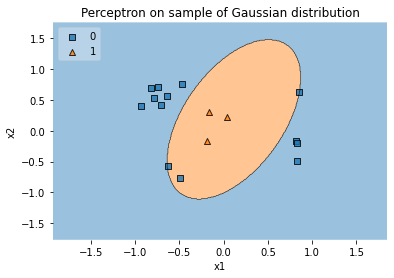

In [102]:
plot_decision_regions(Xtest, Ytest, clf=clasifier, legend=2)
# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron on sample of Gaussian distribution')
plt.show()